In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv("prices.csv")
df.head()

,date,symbol,open,close,low,high,volume
0,05-01-2016 00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,06-01-2016 00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,07-01-2016 00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,08-01-2016 00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,11-01-2016 00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [3]:
if "symbol" in df.columns:
    df = df.drop(columns=["symbol"])

In [4]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date"])
df = df.sort_values("date").reset_index(drop=True)

In [5]:
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [6]:
df["return"] = df["close"].pct_change().fillna(0)

In [8]:
df["ma5"]  = df["close"].rolling(5).mean().bfill()
df["ma10"] = df["close"].rolling(10).mean().bfill()

In [9]:
df["target"] = df["close"].shift(-1)
df = df.dropna()

In [10]:
features = ["open", "high", "low", "close", "volume", "return", "ma5", "ma10"]
X = df[features]
y = df["target"]

In [11]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2

(32.27495205138865, np.float64(36.36298869537906), 0.07486133513547644)

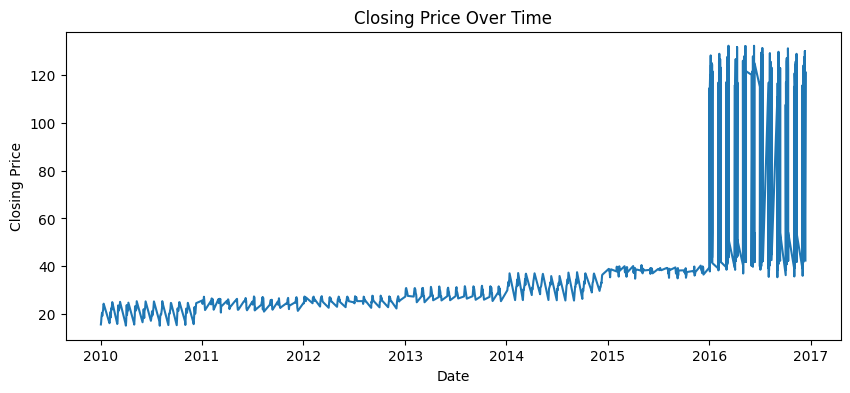

In [15]:
plt.figure(figsize=(10,4))
plt.plot(df["date"], df["close"])
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.show()

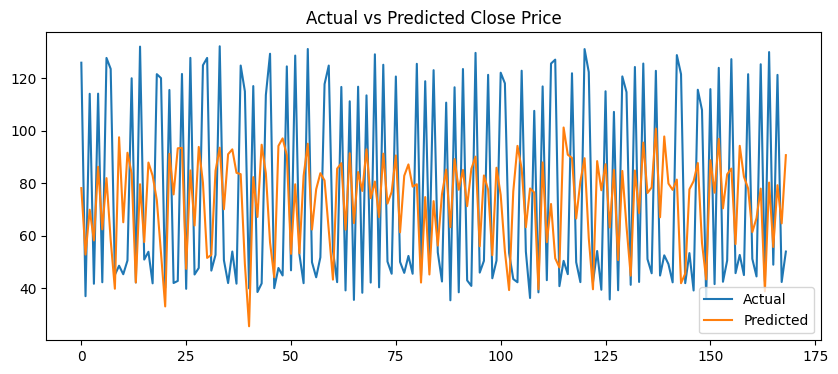

In [16]:
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label="Actual")
plt.plot(y_pred, label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Close Price")
plt.show()

In [18]:
joblib.dump(model, "model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']